# Machine Learning Model for Predicting Selling Price of a Residential Apartment. 

Developing a machine learning model to predict the price of a residential apartment using 'real_estate.csv' dataset.

Author: Adeyinka Edu Date: 03/04/2021

In [22]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
#Check for null values
data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

house_age 
Minimum: 0.0,
Mean: 17.71256038647343, 
Medium: 16.1,
Maximum: 43.8, 
Mode: 0.0

transit_distance 
Minimum: 23.38284,
Mean: 1083.8856889130436, 
Medium: 492.2313,
Maximum: 6488.021, 
Mode: 289.3248

local_convenience_stores 
Minimum: 0,
Mean: 4.094202898550725, 
Medium: 4.0,
Maximum: 10, 
Mode: 0



<ipython-input-17-65920d00b9a2>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-17-65920d00b9a2>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-17-65920d00b9a2>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


price_per_unit 
Minimum: 7.6,
Mean: 37.980193236714975, 
Medium: 38.45,
Maximum: 117.5, 
Mode: 24.7



<ipython-input-17-65920d00b9a2>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


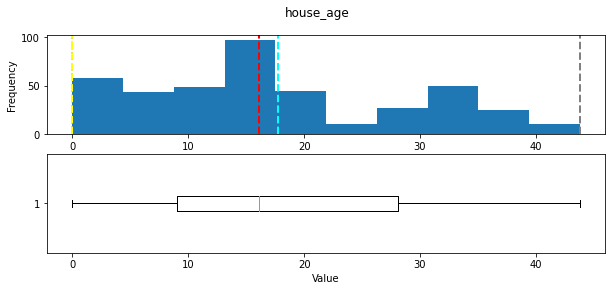

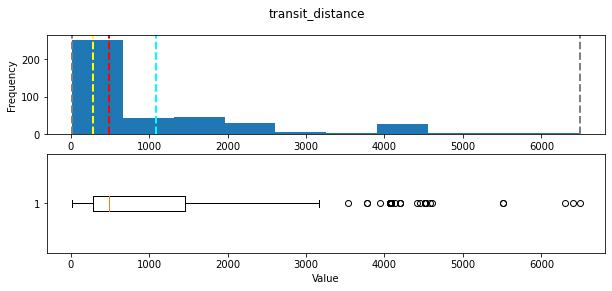

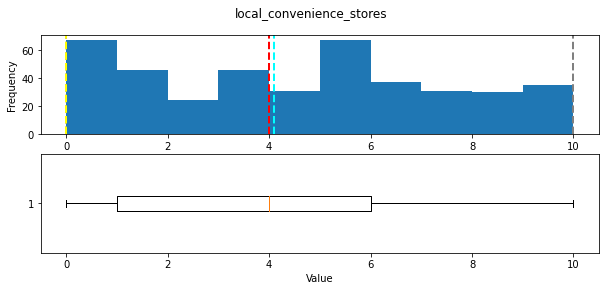

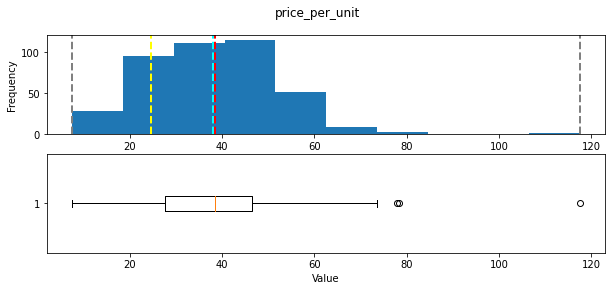

In [17]:
# Function to show summary stats and distribution for a column
def show_distribution(var_data):
    
    #Get Statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]
    
    print(var_data.name,f"\nMinimum: {min_val},\nMean: {mean_val}, \nMedium: {med_val},\nMaximum: {max_val}, \nMode: {mod_val}\n")
    
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))
    
    #plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')
    
    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)
    
    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')
    
    #Add title to the Figure
    fig.suptitle(var_data.name)
    
    #show the figure
    fig.show()
    
# Call the function for each delay field
numericFields = ['house_age','transit_distance', 'local_convenience_stores', 'price_per_unit']
for col in numericFields:
    show_distribution(data[col])

In [19]:
#Remove Outliers for price_unit, transit distance based on 1% and 90% percentiles
priceUnit_01pcntile = data.price_per_unit.quantile(0.01)
priceUnit_90pcntile = data.price_per_unit.quantile(0.90)
data = data[data.price_per_unit < priceUnit_90pcntile]
data = data[data.price_per_unit > priceUnit_01pcntile]

transit_01pcntile = data.transit_distance.quantile(0.01)
transit_90pcntile = data.transit_distance.quantile(0.90)
data = data[data.transit_distance < transit_90pcntile]
data = data[data.transit_distance > transit_01pcntile]

house_age 
Minimum: 0.0,
Mean: 18.40553846153846, 
Medium: 16.4,
Maximum: 43.8, 
Mode: 0.0



<ipython-input-17-65920d00b9a2>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-17-65920d00b9a2>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
<ipython-input-17-65920d00b9a2>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


transit_distance 
Minimum: 57.58945,
Mean: 800.2486670769231, 
Medium: 492.2313,
Maximum: 2707.392, 
Mode: 289.3248

local_convenience_stores 
Minimum: 0,
Mean: 4.273846153846153, 
Medium: 4.0,
Maximum: 10, 
Mode: 5

price_per_unit 
Minimum: 13.7,
Mean: 37.08707692307693, 
Medium: 38.1,
Maximum: 54.8, 
Mode: 31.3



<ipython-input-17-65920d00b9a2>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


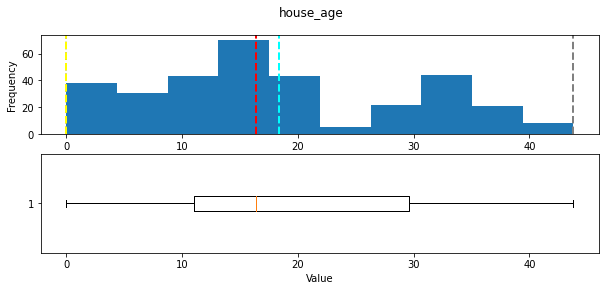

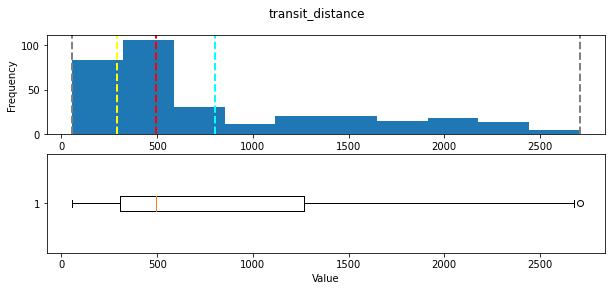

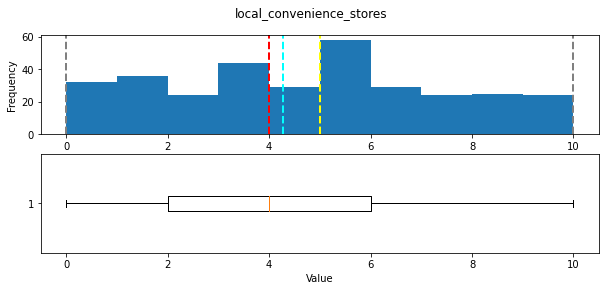

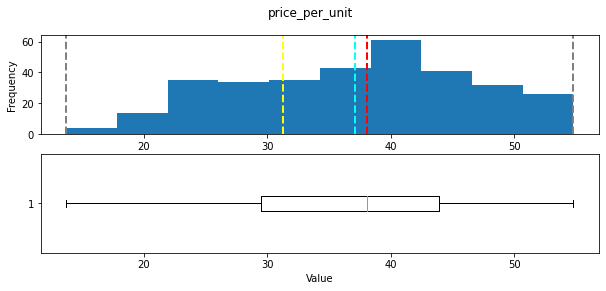

In [20]:
#View Revised distribution
for col in numericFields:
    show_distribution(data[col])

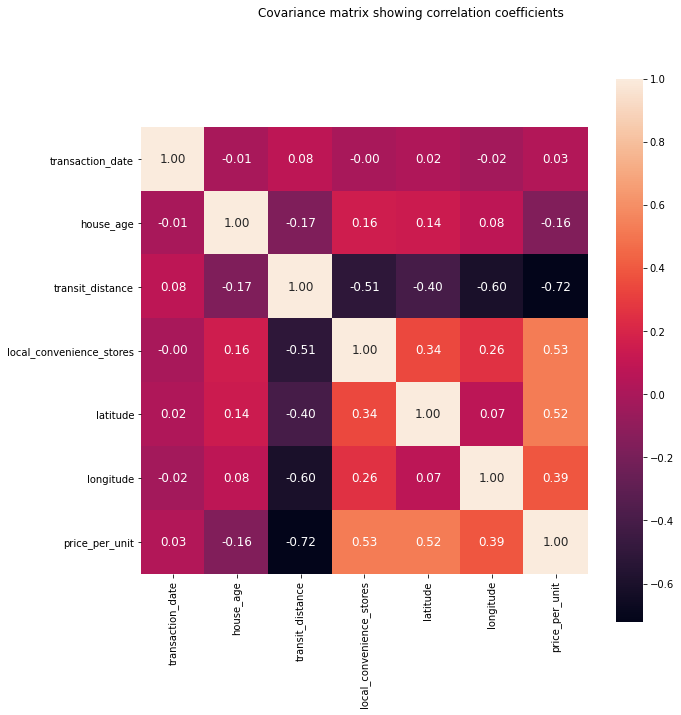

In [31]:
#View numeric correlation 
fig, ax = plt.subplots(figsize = (10,10))
fig.suptitle('Covariance matrix showing correlation coefficients')
ax = sns.heatmap(data.corr(),cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12})

# Selecting Important Features